In [1]:
import tensorflow as tf
import numpy as np
import pickle
np.random.seed(7)

In [2]:
with open ('C:\\Users\\Wilfred\\Desktop\\Look-ahead-N\\input_layer_4_6_12_2.pickle','rb') as file:
    input_data = pickle.load(file)
permutation = list(np.random.permutation(input_data.shape[0]))
input_data = input_data[permutation,:]
print(input_data.shape)
x_train = input_data[:100000, :]
x_test = input_data[100000:105000, :]


(105000, 24)


In [3]:
with open ('C:\\Users\\Wilfred\\Desktop\\Look-ahead-N\\output_layer_4_6_12_2.pickle','rb') as file:
    output_data = pickle.load(file)
output_data = np.transpose(output_data)
output_data = output_data[permutation,:]
y_train = output_data[:100000, :]
y_test = output_data[100000:105000, :]
print(output_data.shape)

(105000, 12)


In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(120, input_shape = [24], activation = 'relu'),
    tf.keras.layers.Dense(120, activation = 'relu'),
    tf.keras.layers.Dense(120, activation = 'relu'),
    tf.keras.layers.Dense(120, activation = 'relu'),
    tf.keras.layers.Dense(120, activation = 'relu'),
    tf.keras.layers.Dense(12, activation = 'sigmoid')
])
adam = tf.keras.optimizers.Adam(lr = 0.005)
model.compile(optimizer = adam, loss = 'binary_crossentropy', metrics = ['accuracy'])

history = model.fit(x_train, y_train, batch_size = 1024, epochs = 130, verbose = 2, validation_data = (x_test, y_test))


Train on 100000 samples, validate on 5000 samples
Epoch 1/130
100000/100000 - 3s - loss: 0.3836 - accuracy: 0.8426 - val_loss: 0.3147 - val_accuracy: 0.8651
Epoch 2/130
100000/100000 - 1s - loss: 0.2848 - accuracy: 0.8777 - val_loss: 0.2669 - val_accuracy: 0.8838
Epoch 3/130
100000/100000 - 1s - loss: 0.2562 - accuracy: 0.8880 - val_loss: 0.2514 - val_accuracy: 0.8897
Epoch 4/130
100000/100000 - 2s - loss: 0.2330 - accuracy: 0.8986 - val_loss: 0.2259 - val_accuracy: 0.9023
Epoch 5/130
100000/100000 - 2s - loss: 0.2136 - accuracy: 0.9079 - val_loss: 0.2044 - val_accuracy: 0.9116
Epoch 6/130
100000/100000 - 1s - loss: 0.1949 - accuracy: 0.9148 - val_loss: 0.1917 - val_accuracy: 0.9155
Epoch 7/130
100000/100000 - 2s - loss: 0.1809 - accuracy: 0.9192 - val_loss: 0.1800 - val_accuracy: 0.9193
Epoch 8/130
100000/100000 - 2s - loss: 0.1703 - accuracy: 0.9223 - val_loss: 0.1738 - val_accuracy: 0.9196
Epoch 9/130
100000/100000 - 2s - loss: 0.1628 - accuracy: 0.9245 - val_loss: 0.1672 - val_accu

Epoch 77/130
100000/100000 - 2s - loss: 0.0392 - accuracy: 0.9851 - val_loss: 0.0609 - val_accuracy: 0.9772
Epoch 78/130
100000/100000 - 2s - loss: 0.0393 - accuracy: 0.9851 - val_loss: 0.0613 - val_accuracy: 0.9776
Epoch 79/130
100000/100000 - 2s - loss: 0.0382 - accuracy: 0.9854 - val_loss: 0.0606 - val_accuracy: 0.9785
Epoch 80/130
100000/100000 - 2s - loss: 0.0406 - accuracy: 0.9846 - val_loss: 0.0629 - val_accuracy: 0.9764
Epoch 81/130
100000/100000 - 1s - loss: 0.0370 - accuracy: 0.9861 - val_loss: 0.0596 - val_accuracy: 0.9789
Epoch 82/130
100000/100000 - 2s - loss: 0.0369 - accuracy: 0.9862 - val_loss: 0.0587 - val_accuracy: 0.9793
Epoch 83/130
100000/100000 - 2s - loss: 0.0377 - accuracy: 0.9859 - val_loss: 0.0580 - val_accuracy: 0.9804
Epoch 84/130
100000/100000 - 2s - loss: 0.0356 - accuracy: 0.9866 - val_loss: 0.0545 - val_accuracy: 0.9808
Epoch 85/130
100000/100000 - 2s - loss: 0.0360 - accuracy: 0.9866 - val_loss: 0.0514 - val_accuracy: 0.9810
Epoch 86/130
100000/100000 -

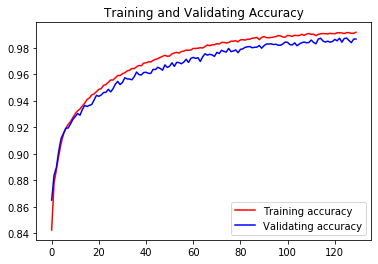

In [6]:
import matplotlib.pyplot as plt
plt.figure()
acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validating accuracy')
plt.title('Training and Validating Accuracy')
#plt.title('Training Accuracy')
plt.legend()
plt.show()

In [8]:
#model.evaluate(x_test, y_test, verbose = 2)

5000/1 - 0s - loss: 0.0630 - accuracy: 0.9720


[0.04715186712741852, 0.9720002]

In [7]:
model.save('C:\\Users\\Wilfred\\Desktop\\weights\\Look_ahead_N\\Look_ahead_N_4_6_12_2_model.h5')